In [8]:
import pandas as pd

df = pd.read_parquet("hf://datasets/NebulaByte/E-Commerce_Customer_Support_Conversations/data/train-00000-of-00001-a5a7c6e4bb30b016.parquet")

In [9]:
df.head()

,issue_area,issue_category,issue_sub_category,issue_category_sub_category,customer_sentiment,product_category,product_sub_category,issue_complexity,agent_experience_level,agent_experience_level_desc,conversation
0,Login and Account,Mobile Number and Email Verification,Verification requirement for mobile number or ...,Mobile Number and Email Verification -> Verifi...,neutral,Appliances,Oven Toaster Grills (OTG),medium,junior,"handles customer inquiries independently, poss...",Agent: Thank you for calling BrownBox Customer...
1,Cancellations and returns,Pickup and Shipping,Reasons for being asked to ship the item,Pickup and Shipping -> Reasons for being asked...,neutral,Electronics,Computer Monitor,less,junior,"handles customer inquiries independently, poss...",Agent: Thank you for calling BrownBox customer...
2,Cancellations and returns,Replacement and Return Process,Inability to click the 'Cancel' button,Replacement and Return Process -> Inability to...,neutral,Appliances,Juicer/Mixer/Grinder,medium,experienced,"confidently handles complex customer issues, e...",Agent: Thank you for calling BrownBox Customer...
3,Login and Account,Login Issues and Error Messages,Error message regarding exceeded attempts to e...,Login Issues and Error Messages -> Error messa...,neutral,Appliances,Water Purifier,less,inexperienced,"may struggle with ambiguous queries, rely on c...","Customer: Hi, I am facing an issue while loggi..."
4,Order,Order Delivery Issues,Delivery not attempted again,Order Delivery Issues -> Delivery not attempte...,negative,Electronics,Bp Monitor,medium,experienced,"confidently handles complex customer issues, e...",Agent: Thank you for contacting BrownBox custo...


In [10]:
df.isnull().sum()

,0
issue_area,0
issue_category,0
issue_sub_category,0
issue_category_sub_category,0
customer_sentiment,0
product_category,0
product_sub_category,0
issue_complexity,0
agent_experience_level,0
agent_experience_level_desc,0


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import nltk

from tqdm import trange
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

In [12]:
df['customer_sentiment'].value_counts()

,count
customer_sentiment,
neutral,552
negative,316
frustrated,105
positive,27


In [13]:
lenght = len(df['conversation'][0])
print(f'Length of a sample  conversation	: {lenght}')

df['Length'] = df['conversation'].str.len()
df.head(10)

word_count = df['conversation'][0].split()
print(f'Word count in a sample  conversation	: {len(word_count)}')

Length of a sample  conversation	: 1487
Word count in a sample  conversation	: 262


In [14]:
def word_count(customer_sentiment):
  customer_sentiment_list =  customer_sentiment.split()
  return len(customer_sentiment_list)


df['Word_count'] = df['conversation'].apply(word_count)
df.head(10)

,issue_area,issue_category,issue_sub_category,issue_category_sub_category,customer_sentiment,product_category,product_sub_category,issue_complexity,agent_experience_level,agent_experience_level_desc,conversation,Length,Word_count
0,Login and Account,Mobile Number and Email Verification,Verification requirement for mobile number or ...,Mobile Number and Email Verification -> Verifi...,neutral,Appliances,Oven Toaster Grills (OTG),medium,junior,"handles customer inquiries independently, poss...",Agent: Thank you for calling BrownBox Customer...,1487,262
1,Cancellations and returns,Pickup and Shipping,Reasons for being asked to ship the item,Pickup and Shipping -> Reasons for being asked...,neutral,Electronics,Computer Monitor,less,junior,"handles customer inquiries independently, poss...",Agent: Thank you for calling BrownBox customer...,1546,271
2,Cancellations and returns,Replacement and Return Process,Inability to click the 'Cancel' button,Replacement and Return Process -> Inability to...,neutral,Appliances,Juicer/Mixer/Grinder,medium,experienced,"confidently handles complex customer issues, e...",Agent: Thank you for calling BrownBox Customer...,2417,413
3,Login and Account,Login Issues and Error Messages,Error message regarding exceeded attempts to e...,Login Issues and Error Messages -> Error messa...,neutral,Appliances,Water Purifier,less,inexperienced,"may struggle with ambiguous queries, rely on c...","Customer: Hi, I am facing an issue while loggi...",2096,371
4,Order,Order Delivery Issues,Delivery not attempted again,Order Delivery Issues -> Delivery not attempte...,negative,Electronics,Bp Monitor,medium,experienced,"confidently handles complex customer issues, e...",Agent: Thank you for contacting BrownBox custo...,3034,519
5,Login and Account,Account Reactivation and Deactivation,Reactivating an inactive account,Account Reactivation and Deactivation -> React...,negative,Appliances,Wet Grinder,medium,junior,"handles customer inquiries independently, poss...",Agent: Thank you for calling BrownBox customer...,2249,386
6,Cancellations and returns,Cash on Delivery (CoD) Refunds,Refund timelines for Cash on Delivery returns,Cash on Delivery (CoD) Refunds -> Refund timel...,frustrated,Appliances,Water Purifier,medium,inexperienced,"may struggle with ambiguous queries, rely on c...","Agent: Hello, thank you for contacting BrownBo...",2522,442
7,Shopping,Product Availability and Status,Ordering 'Out of Stock' or 'Temporarily Unavai...,Product Availability and Status -> Ordering 'O...,neutral,Men/Women/Kids,Shoes,less,experienced,"confidently handles complex customer issues, e...","Agent: Hello, thank you for calling BrownBox C...",1764,317
8,Order,Product Installation,Installation after delivery,Product Installation -> Installation after del...,negative,Electronics,DSLR Camera,medium,inexperienced,"may struggle with ambiguous queries, rely on c...","Agent: Hello, thank you for contacting BrownBo...",2391,415
9,Login and Account,Mobile Number and Email Verification,Issues with receiving the OTP or verification ...,Mobile Number and Email Verification -> Issues...,negative,Appliances,Kitchen Chimney,less,junior,"handles customer inquiries independently, poss...",Agent: Thank you for calling BrownBox Customer...,2007,354


In [16]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [17]:
df['mean_word_length'] = df['conversation'].map(lambda rev: np.mean([len(word) for word in rev.split()]))
df.head(10)


np.mean([len(sent) for sent in tokenize.sent_tokenize(df['conversation'][0])])


df['mean_sent_length'] = df['conversation'].map(lambda rev: np.mean([len(sent) for sent in tokenize.sent_tokenize(rev)]))
df.head(10)

,issue_area,issue_category,issue_sub_category,issue_category_sub_category,customer_sentiment,product_category,product_sub_category,issue_complexity,agent_experience_level,agent_experience_level_desc,conversation,Length,Word_count,mean_word_length,mean_sent_length
0,Login and Account,Mobile Number and Email Verification,Verification requirement for mobile number or ...,Mobile Number and Email Verification -> Verifi...,neutral,Appliances,Oven Toaster Grills (OTG),medium,junior,"handles customer inquiries independently, poss...",Agent: Thank you for calling BrownBox Customer...,1487,262,4.633588,45.125000
1,Cancellations and returns,Pickup and Shipping,Reasons for being asked to ship the item,Pickup and Shipping -> Reasons for being asked...,neutral,Electronics,Computer Monitor,less,junior,"handles customer inquiries independently, poss...",Agent: Thank you for calling BrownBox customer...,1546,271,4.664207,46.968750
2,Cancellations and returns,Replacement and Return Process,Inability to click the 'Cancel' button,Replacement and Return Process -> Inability to...,neutral,Appliances,Juicer/Mixer/Grinder,medium,experienced,"confidently handles complex customer issues, e...",Agent: Thank you for calling BrownBox Customer...,2417,413,4.806295,48.979167
3,Login and Account,Login Issues and Error Messages,Error message regarding exceeded attempts to e...,Login Issues and Error Messages -> Error messa...,neutral,Appliances,Water Purifier,less,inexperienced,"may struggle with ambiguous queries, rely on c...","Customer: Hi, I am facing an issue while loggi...",2096,371,4.601078,58.457143
4,Order,Order Delivery Issues,Delivery not attempted again,Order Delivery Issues -> Delivery not attempte...,negative,Electronics,Bp Monitor,medium,experienced,"confidently handles complex customer issues, e...",Agent: Thank you for contacting BrownBox custo...,3034,519,4.801541,52.839286
5,Login and Account,Account Reactivation and Deactivation,Reactivating an inactive account,Account Reactivation and Deactivation -> React...,negative,Appliances,Wet Grinder,medium,junior,"handles customer inquiries independently, poss...",Agent: Thank you for calling BrownBox customer...,2249,386,4.774611,49.659091
6,Cancellations and returns,Cash on Delivery (CoD) Refunds,Refund timelines for Cash on Delivery returns,Cash on Delivery (CoD) Refunds -> Refund timel...,frustrated,Appliances,Water Purifier,medium,inexperienced,"may struggle with ambiguous queries, rely on c...","Agent: Hello, thank you for contacting BrownBo...",2522,442,4.649321,52.148936
7,Shopping,Product Availability and Status,Ordering 'Out of Stock' or 'Temporarily Unavai...,Product Availability and Status -> Ordering 'O...,neutral,Men/Women/Kids,Shoes,less,experienced,"confidently handles complex customer issues, e...","Agent: Hello, thank you for calling BrownBox C...",1764,317,4.523659,52.060606
8,Order,Product Installation,Installation after delivery,Product Installation -> Installation after del...,negative,Electronics,DSLR Camera,medium,inexperienced,"may struggle with ambiguous queries, rely on c...","Agent: Hello, thank you for contacting BrownBo...",2391,415,4.718072,58.375000
9,Login and Account,Mobile Number and Email Verification,Issues with receiving the OTP or verification ...,Mobile Number and Email Verification -> Issues...,negative,Appliances,Kitchen Chimney,less,junior,"handles customer inquiries independently, poss...",Agent: Thank you for calling BrownBox Customer...,2007,354,4.627119,51.421053


In [27]:
# prompt: map contents of customer sentiment to numbers

# Create a mapping dictionary for customer sentiment to numbers
sentiment_mapping = {'positive': 1, 'negative': -1, 'neutral': 0,'frustrated':-2}

# Apply the mapping to the 'customer_sentiment' column
df['sentiment_numeric'] = df['customer_sentiment'].map(sentiment_mapping)

# Display the DataFrame with the new column
df.head(10)

,issue_area,issue_category,issue_sub_category,issue_category_sub_category,customer_sentiment,product_category,product_sub_category,issue_complexity,agent_experience_level,agent_experience_level_desc,conversation,sentiment_numeric
0,Login and Account,Mobile Number and Email Verification,Verification requirement for mobile number or ...,Mobile Number and Email Verification -> Verifi...,neutral,Appliances,Oven Toaster Grills (OTG),medium,junior,"handles customer inquiries independently, poss...",agent thank calling brownbox customer support ...,0
1,Cancellations and returns,Pickup and Shipping,Reasons for being asked to ship the item,Pickup and Shipping -> Reasons for being asked...,neutral,Electronics,Computer Monitor,less,junior,"handles customer inquiries independently, poss...",agent thank calling brownbox customer support ...,0
2,Cancellations and returns,Replacement and Return Process,Inability to click the 'Cancel' button,Replacement and Return Process -> Inability to...,neutral,Appliances,Juicer/Mixer/Grinder,medium,experienced,"confidently handles complex customer issues, e...",agent thank calling brownbox customer support ...,0
3,Login and Account,Login Issues and Error Messages,Error message regarding exceeded attempts to e...,Login Issues and Error Messages -> Error messa...,neutral,Appliances,Water Purifier,less,inexperienced,"may struggle with ambiguous queries, rely on c...",customer hi facing issue logging account getti...,0
4,Order,Order Delivery Issues,Delivery not attempted again,Order Delivery Issues -> Delivery not attempte...,negative,Electronics,Bp Monitor,medium,experienced,"confidently handles complex customer issues, e...",agent thank contacting brownbox customer suppo...,-1
5,Login and Account,Account Reactivation and Deactivation,Reactivating an inactive account,Account Reactivation and Deactivation -> React...,negative,Appliances,Wet Grinder,medium,junior,"handles customer inquiries independently, poss...",agent thank calling brownbox customer support ...,-1
6,Cancellations and returns,Cash on Delivery (CoD) Refunds,Refund timelines for Cash on Delivery returns,Cash on Delivery (CoD) Refunds -> Refund timel...,frustrated,Appliances,Water Purifier,medium,inexperienced,"may struggle with ambiguous queries, rely on c...",agent hello thank contacting brownbox customer...,-2
7,Shopping,Product Availability and Status,Ordering 'Out of Stock' or 'Temporarily Unavai...,Product Availability and Status -> Ordering 'O...,neutral,Men/Women/Kids,Shoes,less,experienced,"confidently handles complex customer issues, e...",agent hello thank calling brownbox customer su...,0
8,Order,Product Installation,Installation after delivery,Product Installation -> Installation after del...,negative,Electronics,DSLR Camera,medium,inexperienced,"may struggle with ambiguous queries, rely on c...",agent hello thank contacting brownbox customer...,-1
9,Login and Account,Mobile Number and Email Verification,Issues with receiving the OTP or verification ...,Mobile Number and Email Verification -> Issues...,negative,Appliances,Kitchen Chimney,less,junior,"handles customer inquiries independently, poss...",agent thank calling brownbox customer support ...,-1


In [5]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [9]:
def clean( customer_sentiment	):
  customer_sentiment	 =  customer_sentiment	.lower()
  customer_sentiment	 = re.sub('[^a-z A-Z 0-9-]+', '',  customer_sentiment	)
  customer_sentiment	 = " ".join([word for word in  customer_sentiment	.split() if word not in stopwords.words('english')])

  return  customer_sentiment
df['conversation'] = df['conversation'].apply(clean)
df.head(10)
df['conversation'][0]

'agent thank calling brownbox customer support name tom may assist todaycustomer hi tom im trying log account purchase oven toaster grill otg im unable proceed asking mobile number email verification help thatagent sure assist may know registered mobile number email address pleasecustomer registered mobile number 1 123-456-7890agent thank let check im sorry inform dont number records please confirm correct numbercustomer oh im sorry might registered different number please check email address instead johndoeemailcomagent sure let check moments see email address records well sending verification code shortly please check email let know receive itcustomer okay received code itagent please enter verification code field provided click verify email address verified youll able proceed purchasecustomer okay entered code verified thank helpagent youre welcome anything else assist withcustomer thats thank youagent youre welcome great day'

In [25]:
def corpus(text):
    text_list = text.split()
    return text_list
df['conversation_lists'] = df['conversation'].apply(corpus)
df.head(10)
corpus = []
for i in trange(df.shape[0], ncols=150, nrows=10, colour='green', smoothing=0.8):
    corpus += df['conversation_lists'][i]
len(corpus)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 89831.10it/s]


181456

In [26]:
mostCommon = Counter(corpus).most_common(10)
mostCommon

[('thank', 5260),
 ('please', 3335),
 ('order', 3128),
 ('im', 2465),
 ('assist', 2308),
 ('number', 2196),
 ('may', 1840),
 ('email', 1789),
 ('customer', 1774),
 ('check', 1714)]

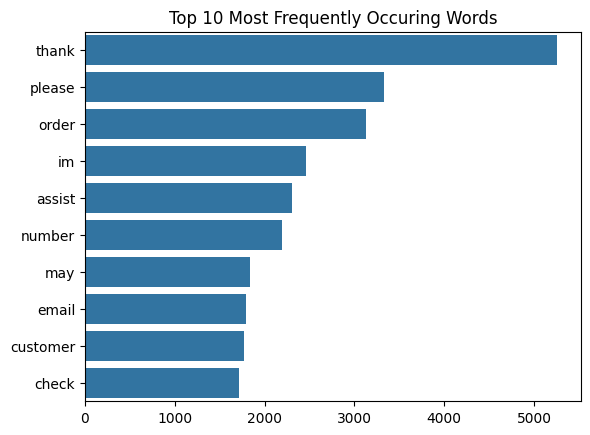

In [27]:
words = []
freq = []
for word, count in mostCommon:
    words.append(word)
    freq.append(count)
sns.barplot(x=freq, y=words)
plt.title('Top 10 Most Frequently Occuring Words')
plt.show()

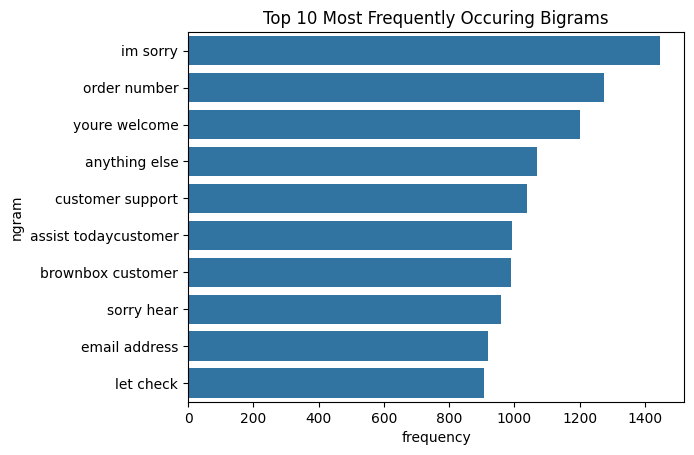

In [29]:
cv = CountVectorizer(ngram_range=(2,2))
bigrams = cv.fit_transform(df['conversation'])
count_values = bigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]
sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Bigrams')
plt.show()

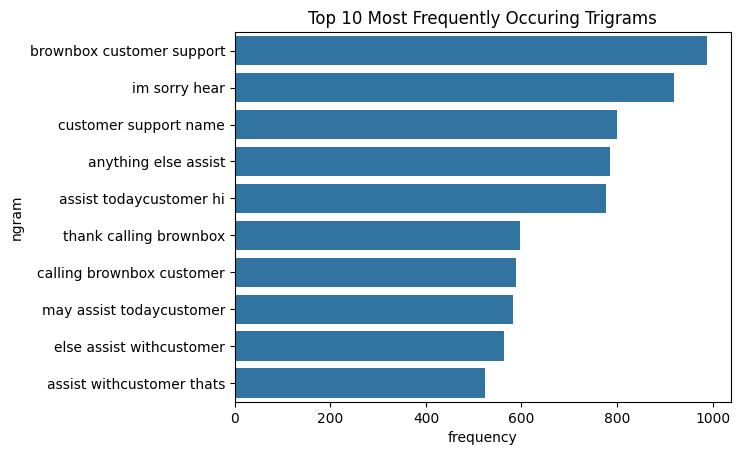

In [31]:
cv1 = CountVectorizer(ngram_range=(3,3))
trigrams = cv1.fit_transform(df['conversation'])
count_values = trigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv1.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]
sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Trigrams')
plt.show()

In [28]:
texts = df["conversation"].tolist()  # Text data
labels = df["sentiment_numeric"]

In [30]:
from textblob import TextBlob

# Custom function for TextBlob sentiment mapping
def classify_sentiment_tb(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0.5:
        return 1  # Positive
    elif 0 < polarity <= 0.5:
        return 0  # Neutral
    elif -0.5 <= polarity <= 0:
        return -1  # Negative
    else:
        return -2  # Frustrated

# Predict sentiments
tb_predictions = [classify_sentiment_tb(text) for text in texts]

# TextBlob Accuracy
tb_accuracy = accuracy_score(labels, tb_predictions)
print("TextBlob Accuracy:", tb_accuracy)


TextBlob Accuracy: 0.551
